<a href="https://colab.research.google.com/github/Nayemhasan/Heart_Failure_Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 

warnings.filterwarnings("ignore")
import datetime

In [ ]:
df=pd.read_csv('heart_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Here in df.dtypes we can see there are 2 object value. our model will not be able to train or test the object values, that's why we have to label these 2 values with Label Encoding.

# Searching for Outliers and if find any then will remove them.

In [ ]:
# Function to creat Diagonostic plots

def plotvariable (df, variable):
    plt.figure(figsize=(16,4))
    
    #histogram
    
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha=0.5)
    
    #boxplot
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    
    plt.show()


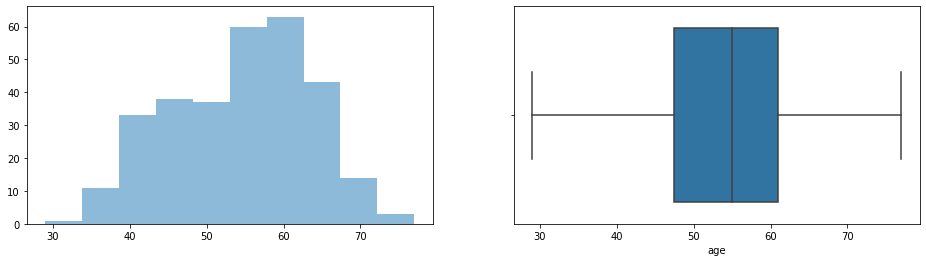

In [ ]:
plotvariable(df, "age")

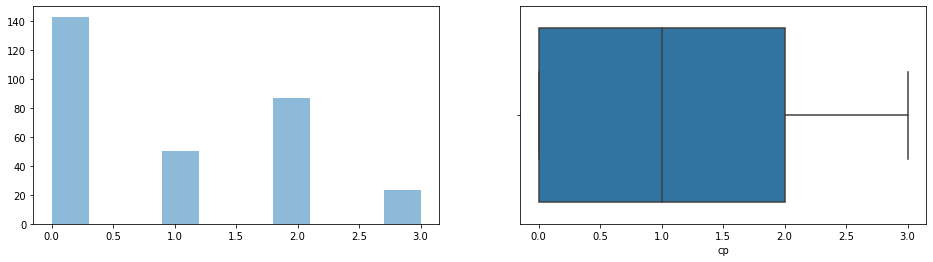

In [ ]:
plotvariable(df, "cp")

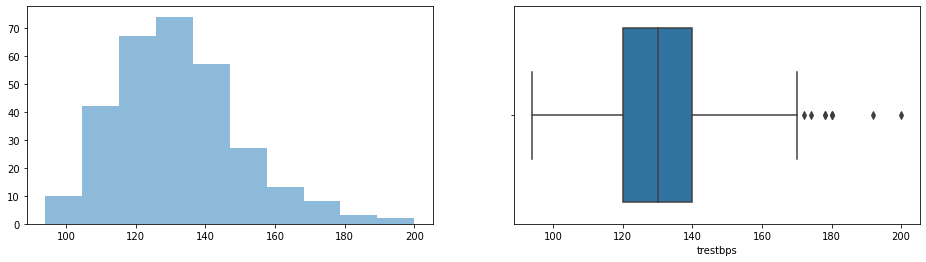

In [ ]:
plotvariable(df, "trestbps")

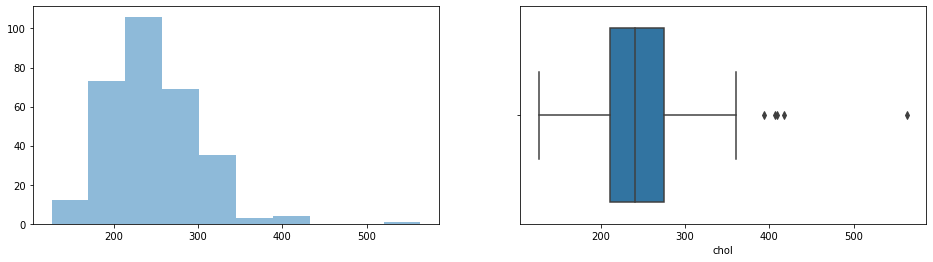

In [ ]:
plotvariable(df, "chol")

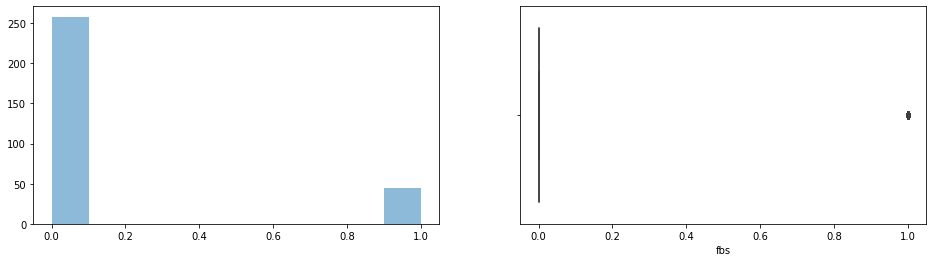

In [ ]:
plotvariable(df, "fbs")

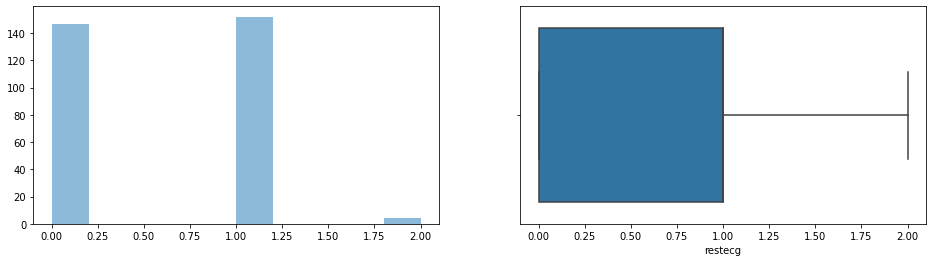

In [ ]:
plotvariable(df, "restecg")

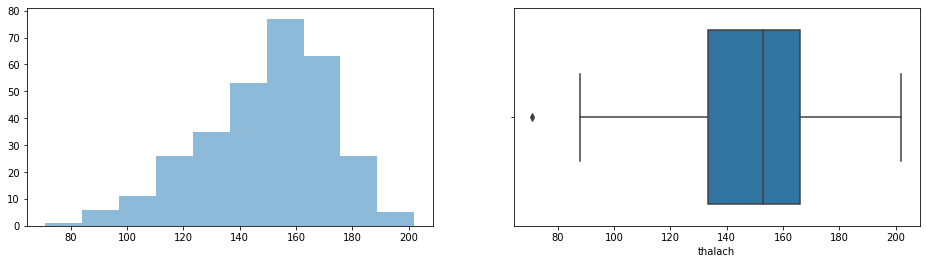

In [ ]:
plotvariable(df, "thalach")

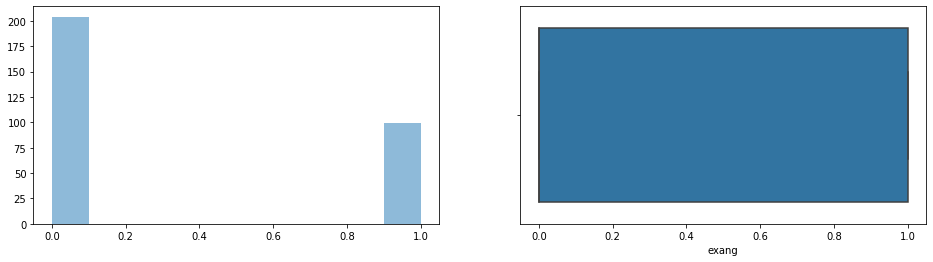

In [ ]:
plotvariable(df, "exang")

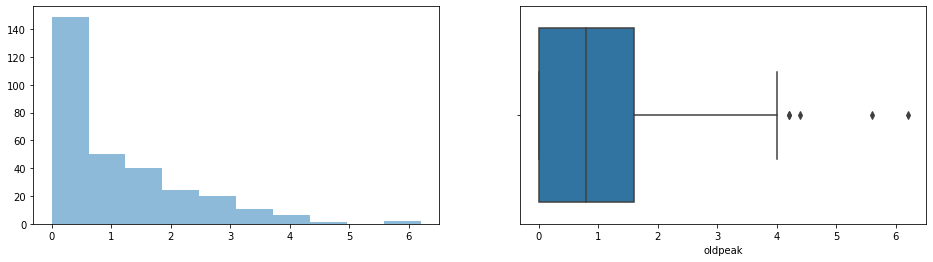

In [ ]:
plotvariable(df, "oldpeak")

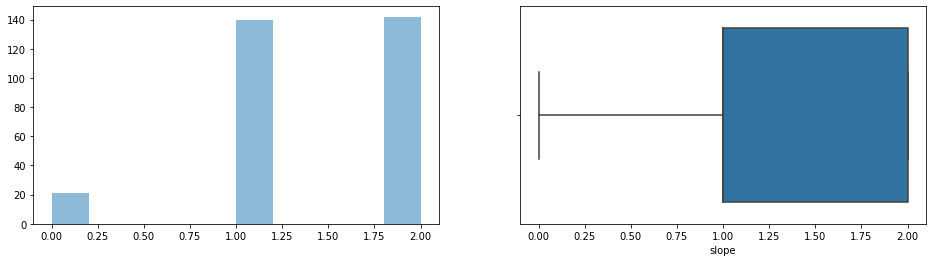

In [ ]:
plotvariable(df, "slope")

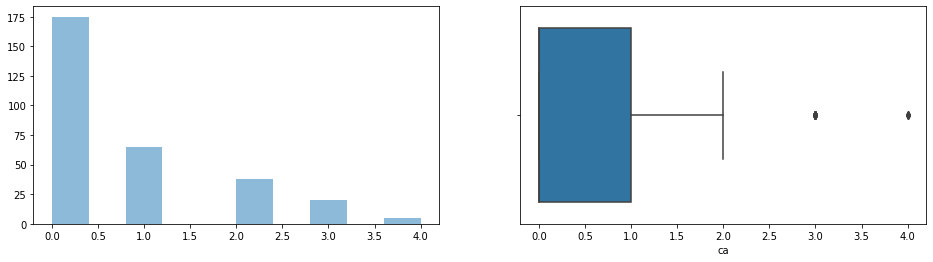

In [ ]:
plotvariable(df, "ca")

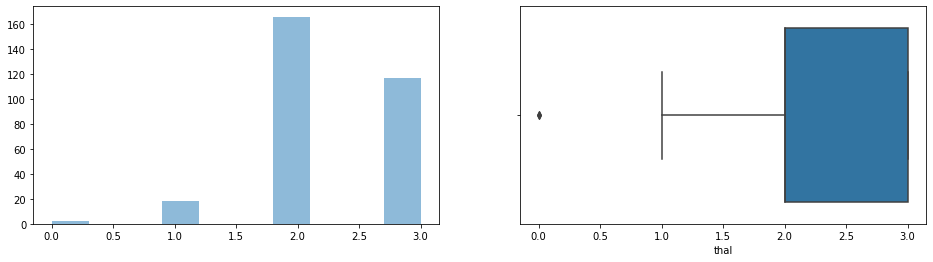

In [ ]:
plotvariable(df, "thal")

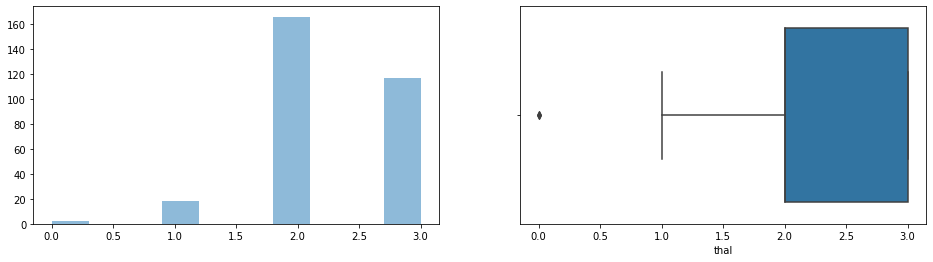

In [ ]:
plotvariable(df, "thal")

# After searching for outliers we can see there are little outliers in 6 features. "trestbps","chol", "thalach","oldpeak","ca","thal"
The amount of outliers is so HUGE. it will interupt in our model prediction so, we will remove them.

In this demo we will follow the IQR approach to filter and deal with outliers. as we know that lower limit for any observation is (Q1- 1.5*IQR) and upper limit is (Q3 + 1.5*IQR)
these terms are as follow:


- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3- Q1

In [ ]:
def find_bounderies(df, variables):
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3-Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry, upper_boundry

# Removing Outliers for "trestbps"

In [ ]:
lower_trestbps, upper_trestbps = find_bounderies(df , "trestbps")
print("upper limit for trestbps is : " , upper_trestbps)
print("lower limit for trestbps is : " , lower_trestbps)

upper limit for trestbps is :  170.0
lower limit for trestbps is :  90.0


In [ ]:
outliers_trestbps = np.where(df["trestbps"] > upper_trestbps, True,
                              np.where(df["trestbps"] < lower_trestbps, True,  False))

In [ ]:
outliers_trestbps

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df.shape

(303, 14)

In [ ]:
df1 = df.loc[~(outliers_trestbps)]
df1.shape

(294, 14)

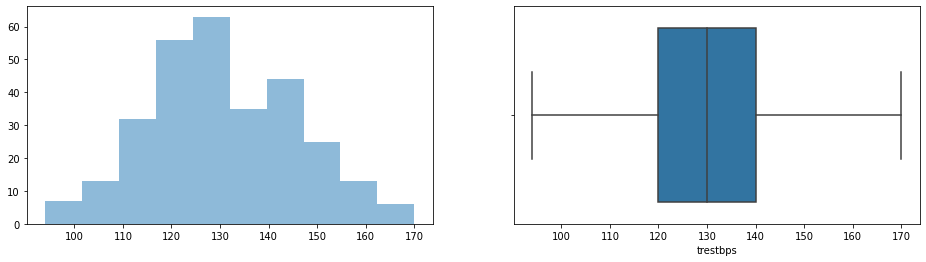

In [ ]:
plotvariable(df1, "trestbps")

# Removing Outliers from "chol".

In [ ]:
lower_chol, upper_chol = find_bounderies(df1 , "chol")
print("upper limit for chol is : " , upper_chol)
print("lower limit for chol is : " , lower_chol)

upper limit for chol is :  367.875
lower limit for chol is :  116.875


In [ ]:
outliers_chol = np.where(df1["chol"] > upper_chol, True,
                              np.where(df1["chol"] < lower_chol, True,  False))

In [ ]:
outliers_chol

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df1.shape

(294, 14)

In [ ]:
df2 = df1.loc[~(outliers_chol)]
df2.shape

(289, 14)

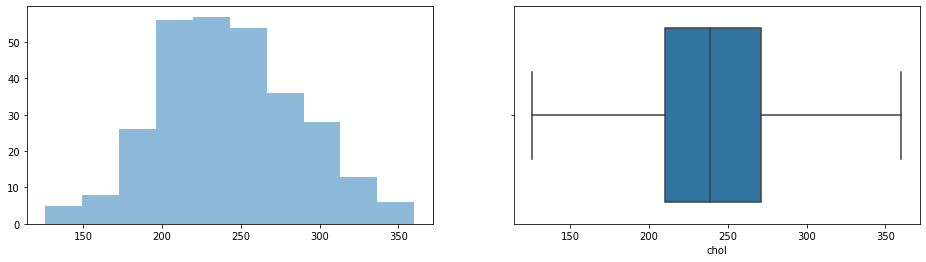

In [ ]:
plotvariable(df2, "chol")

# Removing Outliers from "thalach".

In [ ]:
lower_thalach, upper_thalach = find_bounderies(df2 , "thalach")
print("upper limit for thalach is : " , upper_thalach)
print("lower limit for thalach is : " , lower_thalach)

upper limit for thalach is :  222.0
lower limit for thalach is :  78.0


In [ ]:
outliers_thalach = np.where(df2["thalach"] > upper_thalach, True,
                              np.where(df2["thalach"] < lower_thalach, True,  False))

In [ ]:
outliers_thalach

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df2.shape

(289, 14)

In [ ]:
df3 = df2.loc[~(outliers_thalach)]

df3.shape

(288, 14)

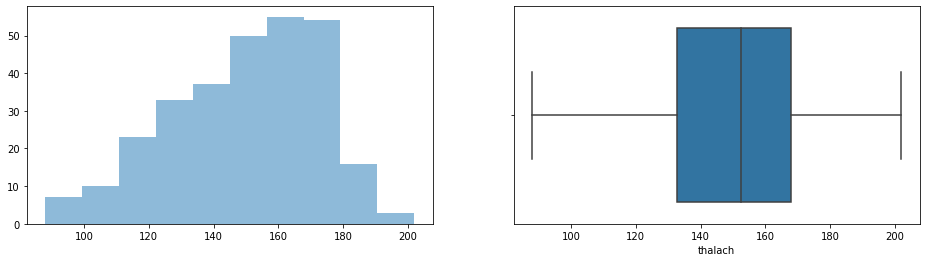

In [ ]:
plotvariable(df3, "thalach")

# Removing bold text outliers from "oldpeak"

In [ ]:
lower_oldpeak, upper_oldpeak = find_bounderies(df3 , "oldpeak")
print("upper limit for oldpeak is : " , upper_oldpeak)
print("lower limit for oldpeakv is : " , lower_oldpeak)


upper limit for oldpeak is :  4.0
lower limit for oldpeakv is :  -2.4000000000000004


In [ ]:
outliers_oldpeak = np.where(df3["oldpeak"] > upper_oldpeak, True,
                              np.where(df3["oldpeak"] < lower_oldpeak, True,  False))


In [ ]:
outliers_oldpeak


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df3.shape

(288, 14)

In [ ]:
df4 = df3.loc[~(outliers_oldpeak)]

df4.shape

(284, 14)

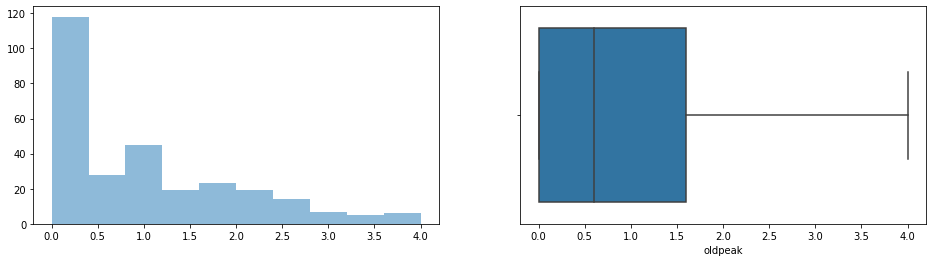

In [ ]:
plotvariable(df4, "oldpeak")

# Removing bold text outliers from "ca"

In [ ]:
lower_ca, upper_ca = find_bounderies(df4 , "ca")
print("upper limit for ca is : " , upper_ca)
print("lower limit for ca is : " , lower_ca)


upper limit for ca is :  2.5
lower limit for ca is :  -1.5


In [ ]:
outliers_ca = np.where(df4["ca"] > upper_ca, True,
                       np.where(df4["ca"] < lower_ca, True,  False))


In [ ]:
outliers_ca

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df4.shape

(284, 14)

In [ ]:
df5 = df4.loc[~(outliers_ca)]

df5.shape


(263, 14)

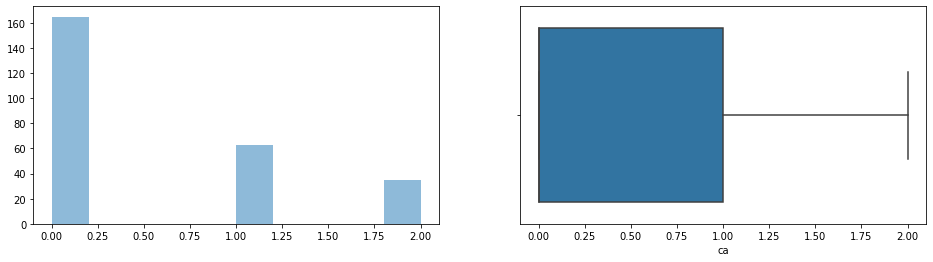

In [ ]:
plotvariable(df5, "ca")

# Removing bold text outliers from "thal"

In [ ]:
lower_thal, upper_thal = find_bounderies(df5 , "thal")
print("upper limit for thal is : " , upper_thal)
print("lower limit for thal is : " , lower_thal)


upper limit for thal is :  4.5
lower limit for thal is :  0.5


In [ ]:
outliers_thal = np.where(df5["thal"] > upper_thal, True,
                              np.where(df5["thal"] < lower_thal, True,  False))


In [ ]:
outliers_thal

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df5.shape

(263, 14)

In [ ]:
df6 = df5.loc[~(outliers_thal)]

df6.shape


(261, 14)

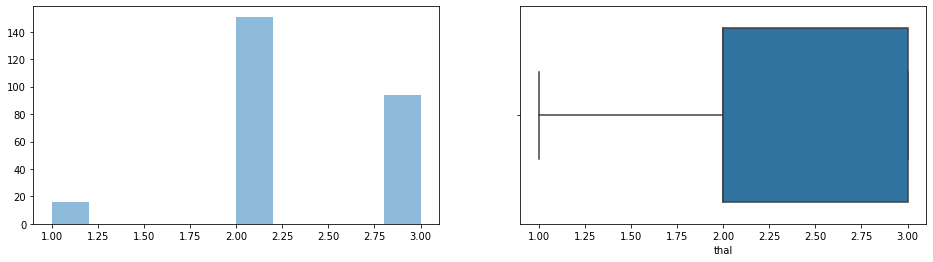

In [ ]:
plotvariable(df6, "thal")

# Splitting Training and Testing data.

In [ ]:
x = df6.drop(columns = 'target')
y = df6['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 261, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling the data with MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
x_train_scaled.max()

1.0000000000000002

In [ ]:
x_train_scaled.min()

0.0

In [ ]:
# the scaler stores the standard deviation of the featuring scale

scaler.scale_

array([0.02564103, 1.        , 0.33333333, 0.01785714, 0.00515464,
       1.        , 1.        , 0.0106383 , 1.        , 0.27777778,
       0.5       , 0.5       , 0.5       ])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [ ]:
x_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.319149,1.0,0.000000,0.342105,0.188596,0.0,0.5,0.457944,1.0,0.70,0.0,0.0,0.0
1,0.489362,1.0,0.333333,0.447368,0.346491,1.0,0.5,0.831776,0.0,0.00,1.0,0.0,0.5
2,0.489362,1.0,0.000000,0.407895,0.377193,0.0,0.5,0.682243,0.0,0.25,1.0,1.0,1.0
3,0.595745,1.0,0.666667,0.447368,0.451754,0.0,0.0,0.514019,0.0,0.10,0.5,0.5,1.0
4,0.744681,0.0,0.000000,0.473684,0.776316,0.0,0.5,0.252336,0.0,0.50,0.5,1.0,0.5


In [ ]:
np.round(x_train_scaled.describe(), 2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00
mean,0.52,0.67,0.34,0.46,0.50,0.13,0.26,0.54,0.31,0.24,0.72,0.26,0.66
std,0.19,0.47,0.35,0.20,0.20,0.34,0.26,0.20,0.46,0.25,0.31,0.36,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.00,0.00,0.34,0.36,0.00,0.00,0.42,0.00,0.00,0.50,0.00,0.50
50%,0.53,1.00,0.33,0.47,0.48,0.00,0.50,0.57,0.00,0.15,0.50,0.00,0.50
75%,0.66,1.00,0.67,0.61,0.63,0.00,0.50,0.69,1.00,0.38,1.00,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Building Model on Scaled dataset.

# LogisticRegression

In [ ]:
# creating Model

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train) 

LogisticRegression()

In [ ]:
y_pred_scaled=reg.predict(x_test_scaled)

In [ ]:
y_pred_scaled

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_test.head()

182    0
117    1
279    0
80     1
256    0
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

print(classification_report(y_test, y_pred_scaled))
print(confusion_matrix(y_test, y_pred_scaled))
print("Training Score: ",reg.score(x_train_scaled, y_train)*100)

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.78      0.97      0.87        30

    accuracy                           0.83        53
   macro avg       0.86      0.81      0.82        53
weighted avg       0.85      0.83      0.82        53

[[15  8]
 [ 1 29]]
Training Score:  85.57692307692307


In [ ]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_scaled})
df7.head()

,Actual,Predicted
182,0,1
117,1,1
279,0,0
80,1,1
256,0,0


In [ ]:
print(accuracy_score(y_test, y_pred_scaled)*100)

83.01886792452831


# DecissionTree

In [ ]:
# using DecissionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=1)

dtree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [ ]:
y_pred=dtree.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train_scaled,y_train)*100)

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        23
           1       0.73      0.90      0.81        30

    accuracy                           0.75        53
   macro avg       0.77      0.73      0.74        53
weighted avg       0.77      0.75      0.75        53

[[13 10]
 [ 3 27]]
Training Score:  77.40384615384616


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

75.47169811320755
